<a href="https://colab.research.google.com/github/danielgrgurevic/PortafolioDataScience/blob/main/Predicci%C3%B3n_precio_cobre_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Data science/Proyecto LSTM/Proyecto LSTM Cochilco/precios_cobre.xlsx')

In [ ]:
df.head(5)

,fecha,nominal,real
0,1960-01-01,32.450,207.596137
1,1960-02-01,33.031,211.313035
2,1960-03-01,31.696,201.497187
3,1960-04-01,32.803,208.534585
4,1960-05-01,31.085,198.236334


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   fecha    765 non-null    datetime64[ns]
 1   nominal  765 non-null    float64       
 2   real     764 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 18.1 KB


In [ ]:
df = df.drop(df.index[-1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   fecha    764 non-null    datetime64[ns]
 1   nominal  764 non-null    float64       
 2   real     764 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 18.0 KB


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df['fecha'] = pd.to_datetime(df['fecha'])
df = df.set_index('fecha')

In [ ]:
df.index.freq = 'MS'

In [ ]:
df.head()

,nominal,real
fecha,,
1960-01-01,32.450,207.596137
1960-02-01,33.031,211.313035
1960-03-01,31.696,201.497187
1960-04-01,32.803,208.534585
1960-05-01,31.085,198.236334


In [ ]:
df.tail()

,nominal,real
fecha,,
2023-04-01,399.796,314.6
2023-05-01,373.501,297.6
2023-06-01,380.393,302.8
2023-07-01,383.830,305.7
2023-08-01,378.830,297.3


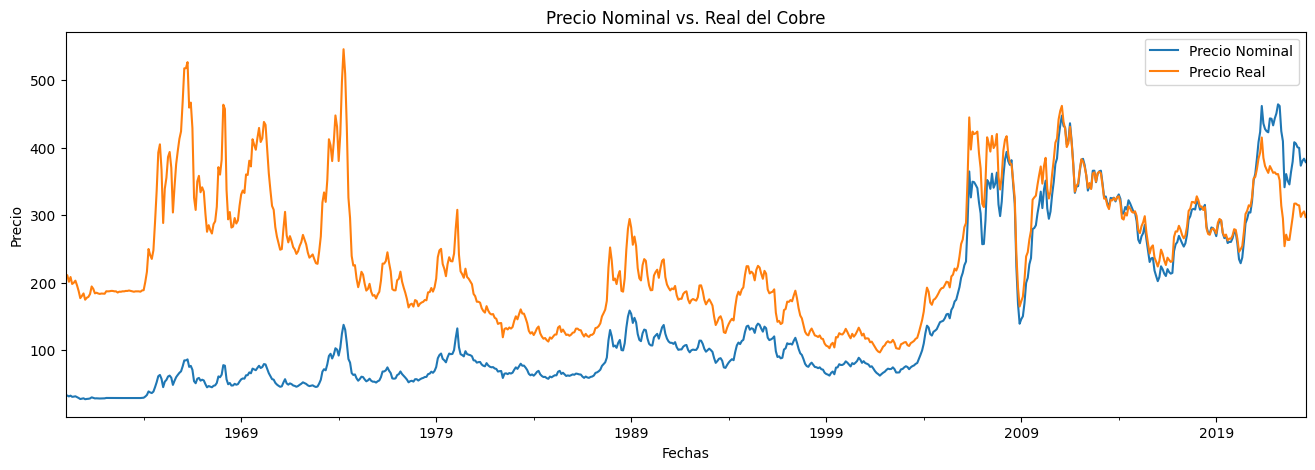

In [ ]:
ax = df['nominal'].plot(figsize=(16, 5), label='Precio Nominal', title='Precio Nominal vs. Real del Cobre')
df['real'].plot(ax=ax, label='Precio Real')
ax.set_xlabel('Fechas')
ax.set_ylabel('Precio')
ax.legend()
plt.show()

In [ ]:
import pandas as pd

df2 = pd.read_csv('/content/drive/MyDrive/Data science/Proyecto LSTM/Proyecto LSTM Cochilco/fed-funds-rate-historical-chart.csv')

# Convertir la columna 'date' a datetime y establecerla como índice
df2['date'] = pd.to_datetime(df2['date'])
df2.set_index('date', inplace=True)

# Resample para obtener el promedio mensual
df2_mes = df2[' value'].resample('MS').mean()

df2_mes.index = df2_mes.index.to_period('M').to_timestamp()
df2_mes = df2_mes.to_frame(name='Average Monthly Rate')
df2_mes.head()


,Average Monthly Rate
date,
1954-07-01,0.799355
1954-08-01,1.220645
1954-09-01,1.066667
1954-10-01,0.848710
1954-11-01,0.833667


In [ ]:
df2_mes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 835 entries, 1954-07-01 to 2024-01-01
Freq: MS
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Monthly Rate  835 non-null    float64
dtypes: float64(1)
memory usage: 13.0 KB


In [ ]:
fecha_inicio = pd.to_datetime('1960-01-01')
fecha_fin = pd.to_datetime('2023-08-01')
df2_mes= df2_mes[(df2_mes.index >= fecha_inicio) & (df2_mes.index <= fecha_fin)]

In [ ]:
df2_mes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 764 entries, 1960-01-01 to 2023-08-01
Freq: MS
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Monthly Rate  764 non-null    float64
dtypes: float64(1)
memory usage: 11.9 KB


In [ ]:
df2_mes.head()

,Average Monthly Rate
date,
1960-01-01,3.991935
1960-02-01,3.965517
1960-03-01,3.838710
1960-04-01,3.916667
1960-05-01,3.846774


In [ ]:
df = df[['real']]
df.head()

,real
fecha,
1960-01-01,207.596137
1960-02-01,211.313035
1960-03-01,201.497187
1960-04-01,208.534585
1960-05-01,198.236334


In [ ]:
df = pd.concat([df, df2_mes], axis=1)
df.head()

,real,Average Monthly Rate
1960-01-01,207.596137,3.991935
1960-02-01,211.313035,3.965517
1960-03-01,201.497187,3.838710
1960-04-01,208.534585,3.916667
1960-05-01,198.236334,3.846774


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 764 entries, 1960-01-01 to 2023-08-01
Freq: MS
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   real                  764 non-null    float64
 1   Average Monthly Rate  764 non-null    float64
dtypes: float64(2)
memory usage: 17.9 KB


In [ ]:
df.corr()

,real,Average Monthly Rate
real,1.000000,-0.232837
Average Monthly Rate,-0.232837,1.000000


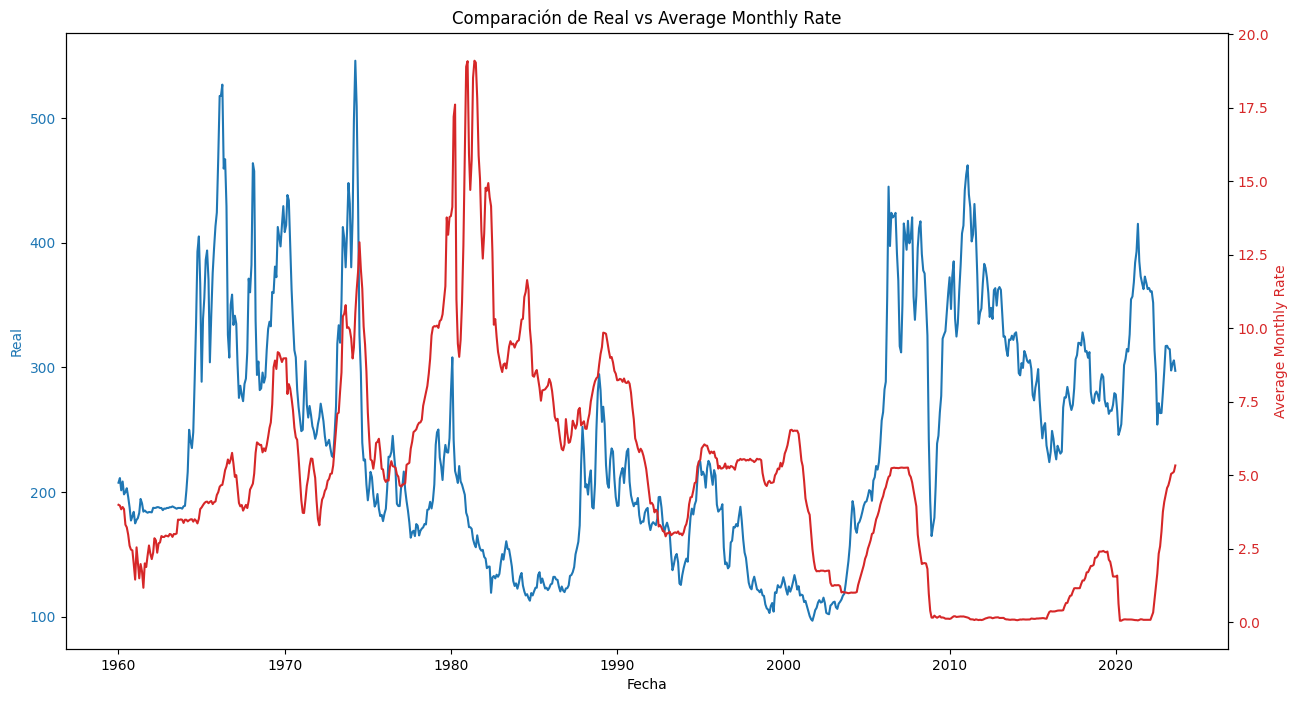

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(15, 8))

color = 'tab:blue'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Real', color=color)
ax1.plot(df_final.index, df_final['real'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Monthly Rate', color=color)
ax2.plot(df_final.index, df_final['Average Monthly Rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Comparación de Real vs Average Monthly Rate')
plt.show()


# Entrenamiento de Moldelo LSTM

In [ ]:
train, test = df[:-12], df[-12:]

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train)
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

In [ ]:
n_input = 12
n_features = 2
generator = TimeseriesGenerator(train_scaled, train_scaled, length=n_input, batch_size=6)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.layers import Dropout

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu',return_sequences=True,
                    input_shape=(n_input, n_features)))
lstm_model.add(LSTM(200, return_sequences=True))
lstm_model.add(Dropout(rate=0.2))
lstm_model.add(LSTM(200, return_sequences=False))
lstm_model.add(Dense(1))

mc = ModelCheckpoint('best_model_lstm.h5', monitor='val_loss', mode='min',
                     verbose=1, save_best_only=True)

lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 12, 200)           162400    
                                                                 
 lstm_5 (LSTM)               (None, 12, 200)           320800    
                                                                 
 dropout_1 (Dropout)         (None, 12, 200)           0         
                                                                 
 lstm_6 (LSTM)               (None, 200)               320800    
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 804201 (3.07 MB)
Trainable params: 804201 (3.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
lstm_model.compile(optimizer='adam',
              loss='mse')

In [ ]:
lstm_model.fit_generator(generator,epochs=90)

Epoch 1/90
124/124 [==============================] - 13s 58ms/step - loss: 0.0393
Epoch 2/90
124/124 [==============================] - 9s 71ms/step - loss: 0.0328
Epoch 3/90
124/124 [==============================] - 13s 102ms/step - loss: 0.0344
Epoch 4/90
124/124 [==============================] - 9s 76ms/step - loss: 0.0321
Epoch 5/90
124/124 [==============================] - 8s 61ms/step - loss: 0.0299
Epoch 6/90
124/124 [==============================] - 7s 57ms/step - loss: 0.0299
Epoch 7/90
124/124 [==============================] - 9s 77ms/step - loss: 0.0293
Epoch 8/90
124/124 [==============================] - 7s 59ms/step - loss: 0.0291
Epoch 9/90
124/124 [==============================] - 10s 79ms/step - loss: 0.0287
Epoch 10/90
124/124 [==============================] - 8s 62ms/step - loss: 0.0289
Epoch 11/90
124/124 [==============================] - 9s 73ms/step - loss: 0.0289
Epoch 12/90
124/124 [==============================] - 9s 70ms/step - loss: 0.0284
Epoch 13/

KeyboardInterrupt: 

<Axes: >

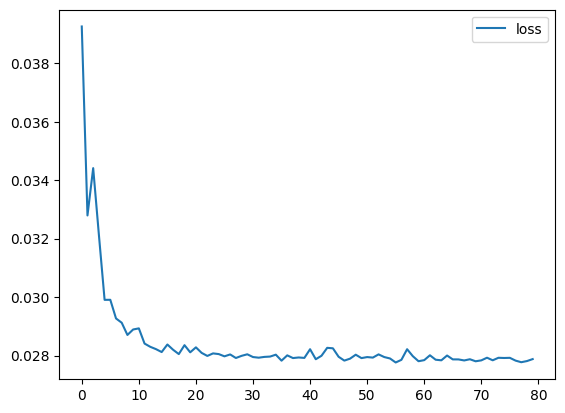

In [ ]:
losses = pd.DataFrame(lstm_model.history.history)
losses.plot()

#Predicción 12 meses

In [ ]:
import numpy as np

pred_list = []

# Obtener el último lote de datos para la predicción inicial
batch = train_scaled[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):
    # Obtener predicción un paso adelante en el tiempo
    pred = lstm_model.predict(batch)[0]

    pred_list.append(pred[0])

    # Actualizar el primer valor (precio 'real') en el último paso de tiempo del lote
    batch[0, -1, 0] = pred[0]

    # Desplazar el lote un paso adelante en el tiempo
    batch = np.append(batch[:,1:,:], batch[:, -1:, :], axis=1)


1/1 [==============================] - 0s 31ms/step


In [ ]:
test_scaled

array([[0.37073991, 0.13287279],
       [0.37096257, 0.15911809],
       [0.40725723, 0.19454925],
       [0.44600122, 0.21223358],
       [0.49053454, 0.22473134],
       [0.49097987, 0.23708045],
       [0.48630388, 0.24168809],
       [0.48474521, 0.25097664],
       [0.44689189, 0.26230984],
       [0.45847055, 0.26387433],
       [0.46492788, 0.26604145],
       [0.44622389, 0.27722194]])

In [ ]:
pred_list

[0.25251693,
 0.17392707,
 0.13948093,
 0.124748334,
 0.117431715,
 0.11340967,
 0.110840574,
 0.10906387,
 0.10786276,
 0.10680678,
 0.10591349,
 0.105033234]

In [ ]:
test

,real
fecha,
2022-09-01,263.4
2022-10-01,263.5
2022-11-01,279.8
2022-12-01,297.2
2023-01-01,317.2
2023-02-01,317.4
2023-03-01,315.3
2023-04-01,314.6
2023-05-01,297.6


In [ ]:
df_test = pd.concat([test,df_predict], axis=1)

In [ ]:
df_test.head()

,real,Prediction
fecha,,
2022-09-01,263.4,264.496829
2022-10-01,263.5,256.599421
2022-11-01,279.8,250.829913
2022-12-01,297.2,246.181540
2023-01-01,317.2,242.379668


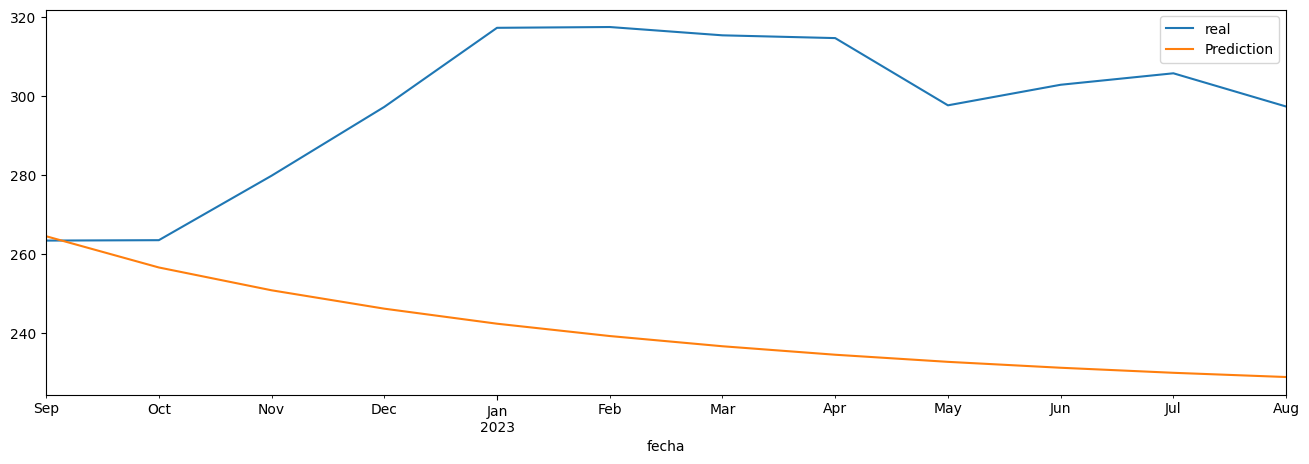

In [ ]:
df_test['real'].plot(figsize = (16,5), legend=True)
df_test['Prediction'].plot(legend = True);


In [ ]:
lstm_rmse_error = rmse(df_test['real'], df_test["Prediction"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['real'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 3960.730548287286
RMSE Error: 62.934335209703185
Mean: 240.06491220371245
